# Introducción al paquete Scipy  <a class="tocSkip">

El paquete **Scipy** es una colección de algoritmos y funciones construida sobre **Numpy** para facilitar cálculos y actividades relacionadas con el trabajo técnico/científico. 



## Una mirada rápida a Scipy

La ayuda de scipy contiene (con `help(scipy)` entre otras cosas)


    Contents
    --------
    SciPy imports all the functions from the NumPy namespace, and in
    addition provides:
    
    Subpackages
    -----------
    Using any of these subpackages requires an explicit import.  For example,
    ``import scipy.cluster``.
    
    ::
    
     cluster                      --- Vector Quantization / Kmeans
     fftpack                      --- Discrete Fourier Transform algorithms
     integrate                    --- Integration routines
     interpolate                  --- Interpolation Tools
     io                           --- Data input and output
     linalg                       --- Linear algebra routines
     linalg.blas                  --- Wrappers to BLAS library
     linalg.lapack                --- Wrappers to LAPACK library
     misc                         --- Various utilities that don't have
                                      another home.
     ndimage                      --- n-dimensional image package
     odr                          --- Orthogonal Distance Regression
     optimize                     --- Optimization Tools
     signal                       --- Signal Processing Tools
     sparse                       --- Sparse Matrices
     sparse.linalg                --- Sparse Linear Algebra
     sparse.linalg.dsolve         --- Linear Solvers
     sparse.linalg.dsolve.umfpack --- :Interface to the UMFPACK library:
                                      Conjugate Gradient Method (LOBPCG)
     sparse.linalg.eigen          --- Sparse Eigenvalue Solvers
     sparse.linalg.eigen.lobpcg   --- Locally Optimal Block Preconditioned
                                      Conjugate Gradient Method (LOBPCG)
     spatial                      --- Spatial data structures and algorithms
     special                      --- Special functions
     stats                        --- Statistical Functions
     

Más información puede encontrarse en la [documentación oficial de Scipy](https://docs.scipy.org/doc/scipy/reference)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Funciones especiales

En el submódulo `scipy.special` están definidas un número de funciones especiales. Una lista general de las funciones definidas (De cada tipo hay varias funciones) es:

-  Airy functions
-  Elliptic Functions and Integrals
-  Bessel Functions
-  Struve Functions
-  Raw Statistical Functions
-  Information Theory Functions
-  Gamma and Related Functions
-  Error Function and Fresnel Integrals
-  Legendre Functions
-  Ellipsoidal Harmonics
-  Orthogonal polynomials
-  Hypergeometric Functions
-  Parabolic Cylinder Functions
-  Mathieu and Related Functions
-  Spheroidal Wave Functions
-  Kelvin Functions
-  Combinatorics
-  Other Special Functions
-  Convenience Functions



In [2]:
from scipy import special

### Funciones de Bessel

Las funciones de Bessel son soluciones de la ecuación diferencial:

$$ x^2 \frac{d^2 y}{dx^2} + x \frac{dy}{dx} + (x^2 - \nu^2)y = 0 . $$

Para valores enteros de $\nu$ se trata de una familia de funciones que aparecen como soluciones de problemas de propagación de ondas en problemas con simetría cilíndrica. 


In [3]:
np.info(special.jv)

jv(x1, x2, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

jv(v, z)

Bessel function of the first kind of real order and complex argument.

Parameters
----------
v : array_like
    Order (float).
z : array_like
    Argument (float or complex).

Returns
-------
J : ndarray
    Value of the Bessel function, :math:`J_v(z)`.

Notes
-----
For positive `v` values, the computation is carried out using the AMOS
[1]_ `zbesj` routine, which exploits the connection to the modified
Bessel function :math:`I_v`,

.. math::
    J_v(z) = \exp(v\pi\imath/2) I_v(-\imath z)\qquad (\Im z > 0)

    J_v(z) = \exp(-v\pi\imath/2) I_v(\imath z)\qquad (\Im z < 0)

For negative `v` values the formula,

.. math:: J_{-v}(z) = J_v(z) \cos(\pi v) - Y_v(z) \sin(\pi v)

is used, where :math:`Y_v(z)` is the Bessel function of the second
kind, computed using the AMOS routine `zbesy`.  Note that the second
term is exactly zero for integer `v`; to improve accuracy 

In [4]:
np.info(special.jn_zeros)

 jn_zeros(n, nt)

Compute zeros of integer-order Bessel function Jn(x).

Parameters
----------
n : int
    Order of Bessel function
nt : int
    Number of zeros to return

References
----------
.. [1] Zhang, Shanjie and Jin, Jianming. "Computation of Special
       Functions", John Wiley and Sons, 1996, chapter 5.
       https://people.sc.fsu.edu/~jburkardt/f_src/special_functions/special_functions.html


In [5]:
# Ceros de la función de Bessel
# Los tres primeros valores de x en los cuales se anula la función de Bessel de orden 4.
special.jn_zeros(4,3)

array([ 7.58834243, 11.06470949, 14.37253667])

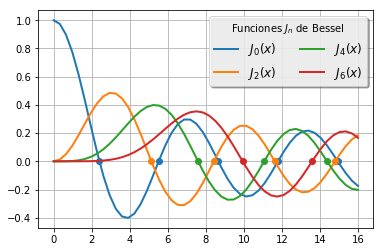

In [6]:
x = np.linspace(0, 16, 50)
for n in range(0,8,2):
  p= plt.plot(x, special.jn(n, x), label='$J_{}(x)$'.format(n))
  z = special.jn_zeros(n, 6)
  z = z[z < 15]
  plt.plot(z, np.zeros(z.size), 'o', color= p[0].get_color())

plt.legend(title='Funciones $J_n$ de Bessel', ncol=2);
plt.grid(True)

In [7]:
# jn es otro nombre para jv
print(special.jn == special.jv)
print(special.jn is special.jv)

True
True


Como vemos, hay funciones para calcular funciones de Bessel. Aquí mostramos los órdenes enteros pero también se pueden utilizar órdenes $\nu$ reales. La lista de funciones de Bessel (puede obtenerse de la ayuda sobre `scipy.special`) es:

 - Bessel Functions
 - Zeros of Bessel Functions
 - Faster versions of common Bessel Functions
 - Integrals of Bessel Functions
 - Derivatives of Bessel Functions
 - Spherical Bessel Functions
 - Riccati-Bessel Functions

Por ejemplo, podemos calcular las funciones esféricas de Bessel, que aparecen en problemas con simetría esférica:

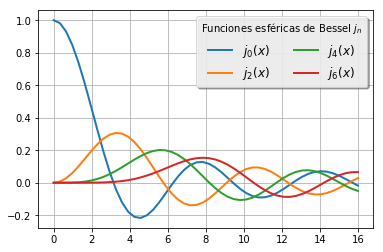

In [8]:
x = np.linspace(0, 16, 50)
for n in range(0,7,2):
  p= plt.plot(x, special.spherical_jn(n, x), label='$j_{}(x)$'.format(n))
plt.legend(title='Funciones esféricas de Bessel $j_n$', ncol=2);
plt.grid(True)

### Función Error

La función error es el resultado de integrar una función Gaussiana

$$ \operatorname{erf}z=\frac{2}{\sqrt{\pi}}\int_{0}^{z}e^{-t^{2}}\mathrm{d}t, $$

mientras que las integrales seno y coseno de Fresnel están definidas por:
\begin{align*}
\operatorname{ssa}= \int_{0}^{z} \sin(\pi/2  t^2) \mathrm{d} t \\
\operatorname{csa}= \int_{0}^{z} \cos(\pi/2  t^2) \mathrm{d} t 
\end{align*}

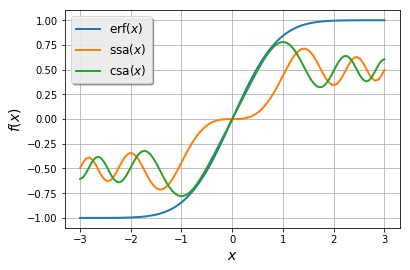

In [9]:
x = np.linspace(-3, 3,100)
f = special.fresnel(x)
plt.plot(x, special.erf(x),'-', label=r'$\mathrm{erf}(x)$')
plt.plot(x, f[0],'-', label=r'$\mathrm{ssa}(x)$')
plt.plot(x, f[1],'-', label=r'$\mathrm{csa}(x)$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend(loc='best')
plt.grid(True)

### Evaluación de polinomios ortogonales

`Scipy.special` tiene funciones para evaluar eficientemente polinomios ortogonales

Por ejemplo si queremos, evaluar los polinomios de Laguerre, solución de la ecuación diferencial:
$$
x\frac{d^2}{dx^2}L_n + (1 - x)\frac{d}{dx}L_n + nL_n = 0
$$

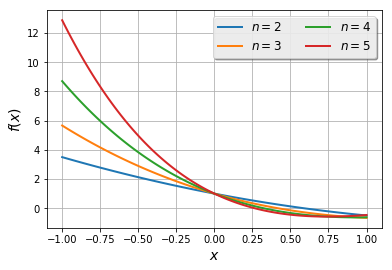

In [10]:
x = np.linspace(-1, 1,100)
for n in range(2,6):
  plt.plot(x, special.eval_laguerre(n, x),'-', label=r'$n={}$'.format(n))
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend(loc='best', ncol=2)
plt.grid(True)

Los polinomios de Chebyshev son solución de
$$ (1 - x^2)\frac{d^2}{dx^2}T_n - x\frac{d}{dx}T_n + n^2T_n = 0$$

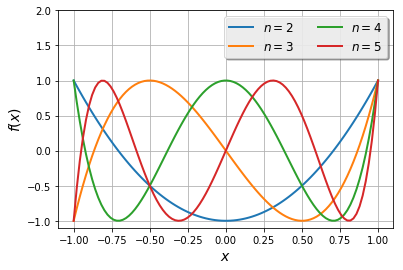

In [11]:
x = np.linspace(-1, 1,100)
for n in range(2,6):
  plt.plot(x, special.eval_chebyt(n, x),'-', label=r'$n={}$'.format(n))
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend(loc='best', ncol=2)
plt.ylim((-1.1,2))
plt.grid(True)

### Factorial, permutaciones y combinaciones

Hay funciones para calcular varias funciones relacionadas con combinatoria

La función `comb()` da el número de maneras de elegir `k` de un total de `N` elementos. Sin repeticiones está dada por:
$$ \frac{N!}{k! (N-k)!}$$
mientras que si cada elemento puede repetirse, la fórmula es:
$$ \frac{(N+k-1)!}{k! (N-1)!}$$


In [12]:
N = 10
k =np.arange(2,4)

In [13]:
special.comb(N, k)

array([ 45., 120.])

In [14]:
# Si usamos exact=True, k no puede ser un array
special.comb(N,3,exact=True)

120

In [15]:
special.comb(N,k, repetition=True)

array([ 55., 220.])

El número de permutaciones se obtiene con la función `perm()`, y está dado por:
$$ \frac{N!}{(N-k)!}$$

In [16]:
special.perm(N,k)

array([ 90., 720.])

que corresponde a:
$$ \frac{10!}{(10-3)!} = 10 \cdot 9 \cdot 8 $$


Los números factorial (N!) y doble factorial (N!!) son:

In [17]:
N= np.array([3,6,8])
print("{}! = {}".format(N, special.factorial(N)))
print("{}!! = {}".format(N, special.factorial2(N)))

[3 6 8]! = [6.000e+00 7.200e+02 4.032e+04]
[3 6 8]!! = [  3.  48. 384.]


## Integración numérica

Scipy tiene rutinas para integrar numéricamente funciones o tablas de datos. Por ejemplo para integrar funciones en la forma:
$$I= \int_{a}^{b} f(x)\, dx $$
la función más utilizada es `quad`, que llama a distintas rutinas del paquete **QUADPACK** dependiendo de los argumentos que toma. Entre los aspectos más notables está la posibilidad de elegir una función de peso entre un conjunto definido de funciones, y la posibilidad de elegir un dominio de integración finito o infinito.

In [18]:
from scipy import integrate

In [19]:
x = np.linspace(0., 10, 100)

In [20]:
def f1(x):
  return np.sin(x)*np.exp(-np.square(x+1)/10)

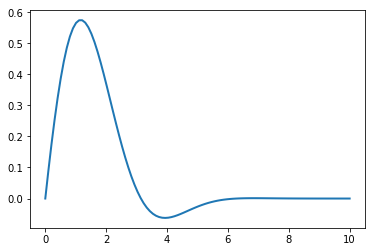

In [21]:
plt.plot(x,f1(x))

In [22]:
integrate.quad(f1,0,1)

(0.34858491873298725, 3.870070028144515e-15)

In [23]:
np.info(integrate.quad)

 quad(func, a, b, args=(), full_output=0, epsabs=1.49e-08, epsrel=1.49e-08,
      limit=50, points=None, weight=None, wvar=None, wopts=None, maxp1=50,
      limlst=50)

Compute a definite integral.

Integrate func from `a` to `b` (possibly infinite interval) using a
technique from the Fortran library QUADPACK.

Parameters
----------
func : {function, scipy.LowLevelCallable}
    A Python function or method to integrate.  If `func` takes many
    arguments, it is integrated along the axis corresponding to the
    first argument.

    If the user desires improved integration performance, then `f` may
    be a `scipy.LowLevelCallable` with one of the signatures::

        double func(double x)
        double func(double x, void *user_data)
        double func(int n, double *xx)
        double func(int n, double *xx, void *user_data)

    The ``user_data`` is the data contained in the `scipy.LowLevelCallable`.
    In the call forms with ``xx``,  ``n`` is the length of the ``xx``
    array w

In [24]:
[((0, xmax), integrate.quad(f1,0,xmax)[0]) for xmax in np.arange(1,5)]

[((0, 1), 0.34858491873298725),
 ((0, 2), 0.8600106383901718),
 ((0, 3), 1.0438816972950689),
 ((0, 4), 1.0074874684274517)]

La rutina devuelve dos valores. El primero es la estimación del valor de la integral y el segundo una estimación del **error absoluto** . Además, la función acepta límites de integración infinitos ($\pm \infty$, definidos en **Numpy**)

In [25]:
integrate.quad(f1,-np.inf,np.inf)

(-0.3871487639489655, 5.459954581847885e-09)

### Ejemplo de función fuertemente oscilatoria

In [26]:
k = 200
L = 2*np.pi
a = 0.1
def f2(x):
  return np.sin(k*x)*np.exp(-a*x)

In [27]:
# Valor exacto de la integral
I=k/a**2*(np.exp(-a*L)-1)/(1-k**2/a**2)
print(I)

0.0023325601276845158


In [28]:
Iq= integrate.quad(f2,0,L)

/usr/lib64/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


In [29]:
I_err = (I-Iq[0])/I             # Error relativo con el valor exacto
print("I= {:.5g} ± {:.5g}\nError relativo= {:.6g}\n".format(*Iq, I_err))

I= -0.0043611 ± 0.019119
Error relativo= 2.86965



El error relativo entre el valor obtenido numéricamente y el valor exacto `I` es grande. Esto se debe a la naturaleza del integrando. Grafiquemos sólo una pequeña parte

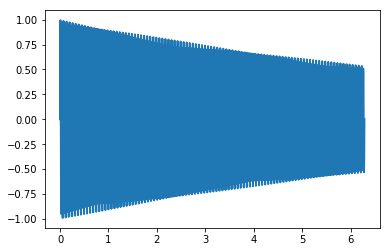

In [31]:
x = np.linspace(0,L,1500)
plt.plot(x, f2(x))

La rutina `quad` es versatil y tiene una opción específica para integrandos oscilatorios, que permite calcular las integrales de una función $f$ multiplicadas por una función oscilatoria
$$I= \int_{a}^{b} f(x)\,weight( w x)\, dx $$
Para ello debemos usar el argumento `weight` y `wvar`. En este caso usaremos `weight='sin'`

In [32]:
# La función sin el factor oscilatorio:
def f3(x):
  return np.exp(-a*x)

In [33]:
Is= integrate.quad(f3,0,L, weight='sin', wvar=k)

In [34]:
I_err = (I-Is[0])/I             # Error relativo con el valor exacto 
print("I= {:.5g} ± {:.5g}\nError relativo= {:.6g}\n".format(*Is, I_err))

I= 0.0023326 ± 1.1788e-33
Error relativo= 5e-07



El error relativo obtenido respecto al valor exacto es varios órdenes de magnitud menor. Comparemos los tiempos de ejecución:

In [35]:
%timeit integrate.quad(f2,0,L)

/usr/lib64/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


8.17 ms ± 85.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [36]:
%timeit integrate.quad(f3,0,L, weight='sin', wvar=k)

61.1 µs ± 585 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Usar un integrador más específico para el integrando no sólo nos da un mejor resultado sino que el tiempo de ejecución es más de 100 veces más corto.

### Funciones de más de una variable

Consideremos el caso en que queremos integrar alguna función especial. Podemos usar Scipy para realizar la integración y para evaluar el integrando.  Como `special.jn` depende de dos variables, tenemos que crear una función intermedia que dependa sólo de la variable de integración

In [37]:
integrate.quad(lambda x: special.jn(0,x), 0 , 10)

(1.0670113039567362, 7.434789460651883e-14)

En realidad, la función `quad` permite el uso de argumentos que se le pasan a la función a integrar. La forma de llamar al integrador será en general:

```python
  quad(func, a, b, args=(), full_output=0, epsabs=1.49e-08, epsrel=1.49e-08,
      limit=50, points=None, weight=None, wvar=None, wopts=None, maxp1=50,
      limlst=50)
  ```

El argumento `args` debe ser una tupla, y contiene los argumentos extra que acepta la función a integrar, esta función debe llamarse en la forma `func(x, *args)`. O sea que siempre la integramos respecto a su primer argumento. Apliquemos esto a la función de Bessel. En este caso, la variable a integrar es el segundo argumento de `special.jn`, por lo que creamos una función con el orden correcto de argumentos:

In [38]:
def bessel_n(x, n):
  return special.jn(n,x)

In [39]:
integrate.quad(bessel_n, 0, 10, args=(0,))

(1.0670113039567362, 7.434789460651883e-14)

In [40]:
print('n    \int_0^10  J_n(x) dx')
for n in range(6):
  print(n,': ', integrate.quad(bessel_n, 0, 10, args=(n,))[0])

n    \int_0^10  J_n(x) dx
0 :  1.0670113039567362
1 :  1.2459357644513482
2 :  0.9800658116190144
3 :  0.7366751370811073
4 :  0.8633070530086401
5 :  1.1758805092851239


## Álgebra lineal

El módulo de álgebra lineal se solapa un poco con funciones similares en **Numpy**. Ambos usan finalmente una implementación de bibliotecas conocidas (LAPACK, BLAS). La diferencia es que **Scipy** asegura que utiliza las optimizaciones de la librería ATLAS y presenta algunos métodos y algoritmos que no están presentes en **Numpy**. 

Una de las aplicaciones más conocidas por nosotros es la rotación de vectores. Como bien sabemos rotar un vector es equivalente a multiplicarlo por la matriz de rotación correspondiente. Esquemáticamente:


![](https://imgs.xkcd.com/comics/matrix_transform.png)

In [41]:
from scipy import linalg

Este módulo tiene funciones para trabajar con matrices, descriptas como *arrays* bidimensionales.

In [42]:
arr = np.array([[3, 2,1],[6, 4,1],[12, 8, 13.3]])
print(arr)

[[ 3.   2.   1. ]
 [ 6.   4.   1. ]
 [12.   8.  13.3]]


In [43]:
A = np.array([[1, -2,-3],[1, -1,-1],[-1, 3, 1]])
print(A)

[[ 1 -2 -3]
 [ 1 -1 -1]
 [-1  3  1]]


In [44]:
# La matriz transpuesta
A.T

array([[ 1,  1, -1],
       [-2, -1,  3],
       [-3, -1,  1]])

### Productos y normas

#### Norma de un vector

La norma está dada por
$$||v|| = \sqrt{v_1^2+...+v_n^2}$$ 

In [45]:
v = np.array([2,1,3])
linalg.norm(v)                  # Norma

3.7416573867739413

In [46]:
linalg.norm(v) == np.sqrt(np.sum(np.square(v)))

True

#### Producto interno

El producto entre una matriz y un vector está definido en **Numpy** mediante la función `dot()`

In [47]:
w1 = np.dot(A, v)                # Multiplicación de matrices
w1

array([-9, -2,  4])

In [48]:
w2 = np.dot(v,  A)
w2

array([ 0,  4, -4])

In [49]:
np.dot(v.T,  A)


array([ 0,  4, -4])

In [50]:
print(v.shape, A.shape)

(3,) (3, 3)


El producto interno entre vectores se calcula de la misma manera
$$ \langle v, w \rangle$$

In [52]:
np.dot(v,w1)

-8

y está relacionado con la norma
$$||v|| = \sqrt{ \langle v, v \rangle}$$

In [53]:
linalg.norm(v) == np.sqrt(np.dot(v,v))

True

In [54]:
np.dot(v,A)

array([ 0,  4, -4])

In [55]:
v.shape

(3,)

In [56]:
v2 = np.reshape(v, (3,1))

In [57]:
v2.shape

(3, 1)

In [58]:
np.dot(A, v2)

array([[-9],
       [-2],
       [ 4]])

In [59]:
np.dot(A, v2).shape

(3, 1)

Ahora las dimensiones de `v2` y `A` no coinciden para hacer el producto matricial
```python
np.dot(v2, A)
```

En versiones nuevas de Python la multiplicación de matrices puede realizarse con el operador `@`

In [60]:
np.dot( v2,A)

ValueError: shapes (3,1) and (3,3) not aligned: 1 (dim 1) != 3 (dim 0)

In [61]:
A @ v2

array([[-9],
       [-2],
       [ 4]])

In [62]:
v3 = np.dot(v2.T, A)

In [63]:
print(v3)
v3.shape

[[ 0  4 -4]]


(1, 3)

Notemos que el producto interno se puede pensar como un producto de matrices. En este caso, el producto de una matriz de 3x1, por otra de 1x3:

$$ v^{t} \, w = \begin{pmatrix} -9&-2&4 \end{pmatrix} \begin{pmatrix} 2\\1\\3 \end{pmatrix} $$

donde estamos pensando al vector como columna.

#### Producto exterior

El producto exterior puede ponerse en términos de multiplicación de matrices como
$$v\otimes w = vw^{t} = \begin{pmatrix} -9\\-2\\4 \end{pmatrix} \begin{pmatrix} 2&1&3 \end{pmatrix}$$

In [65]:
oprod = np.outer(v,w1)
print(oprod)

[[-18  -4   8]
 [ -9  -2   4]
 [-27  -6  12]]


### Aplicación a la resolución de sistemas de ecuaciones

Vamos a usar `scipy.linalg` permite obtener determinantes e inversas de matrices. Vamos a usarlo para resolver un sistema de ecuaciones lineales:

$$
\left\{
\begin{array}{rl}
a_{11} x_1 + a_{12} x_2 + a_{13} x_3 &= b_1 \\
a_{21} x_1 + a_{22} x_2 + a_{23} x_3 &= b_2 \\
a_{31} x_1 + a_{32} x_2 + a_{33} x_3 &= b_3
\end{array}
\right.
$$
Esta ecuación se puede escribir en forma matricial como
$$ \begin{pmatrix}a_{11}&a_{12} & a_{13}\\a_{21}&a_{22}&a_{23}\\a_{31}&a_{32}&a_{33}\end{pmatrix}
\begin{pmatrix}x_1\\x_2\\x_3\end{pmatrix} = \begin{pmatrix}b_1\\b_2\\b_3\end{pmatrix}
$$

Veamos un ejemplo concreto. Supongamos que tenemos el siguiente sistema
$$
\left\{
\begin{array}{rl}
 x_1 + 2 x_2 + 3 x_3 &= 1 \\
2 x_1 +  x_2 + 3 x_3 &= 2 \\
4 x_1 +  x_2 - x_3 &= 1
\end{array}
\right.
$$
por lo que, en forma matricial será:
$$ A = \begin{pmatrix} 1 &2 &3 \\ 2& 1& 3 \\ 4& 1& -1 \end{pmatrix} $$
y 
$$ b =  \begin{pmatrix} 1 \\ 2 \\ 3 \end{pmatrix} $$

In [66]:
A = np.array([[1,2,3],[2,1,3],[4,1,-1]])
b = np.array([[1,2,3]]).T
print('A=', A,"\n")
print('b=', b,"\n")

A= [[ 1  2  3]
 [ 2  1  3]
 [ 4  1 -1]] 

b= [[1]
 [2]
 [3]] 



In [67]:
x = np.dot(linalg.inv(A), b)
print('Resultado:\n', x)

Resultado:
 [[ 0.83333333]
 [-0.16666667]
 [ 0.16666667]]


### Descomposición de matrices

Si consideramos el mismo problema de resolución de ecuaciones
$$A x = b $$
pero donde debemos resolver el problema para un valor dado de los coeficientes (la matriz $A$) y muchos valores distintos del vector $b$, suele ser útil realizar lo que se llama la descompocición $LU$ de la matriz.

Si escribimos a la matriz $A$ como el producto de tres matrices $A = PLU$ donde $P$ es una permutación de las filas, $L$ es una matriz triangular inferior (Los elementos por encima de la diagonal son nulos) y $U$ una triangular superior.
En este caso los dos sistemas:
$$ Ax = b \qquad  \mathrm{ y } \qquad P A x = Pb  $$
tienen la misma solución. Entonces podemos resolver el sistema en dos pasos:

$$ Ly=b $$ 
con
$$ y = Ux. $$

En ese caso, resolvemos una sola vez la descompocición $LU$, y luego ambas ecuaciones se pueden resolver eficientemente debido a la forma de las matrices.

In [68]:
A = np.array([[1,3,4],[2,1,3],[4,1,2]])

print('A=', A,"\n")

P, L, U = linalg.lu(A)
print("PLU=", np.dot(P, np.dot(L, U)))
print("\nLU=", np.dot(L, U))
print("\nL=",L)
print("\nU=", U)

A= [[1 3 4]
 [2 1 3]
 [4 1 2]] 

PLU= [[1. 3. 4.]
 [2. 1. 3.]
 [4. 1. 2.]]

LU= [[4. 1. 2.]
 [1. 3. 4.]
 [2. 1. 3.]]

L= [[1.         0.         0.        ]
 [0.25       1.         0.        ]
 [0.5        0.18181818 1.        ]]

U= [[4.         1.         2.        ]
 [0.         2.75       3.5       ]
 [0.         0.         1.36363636]]


### Autovalores y autovectores

La necesidad de encontrar los autovalores y autovectores de una matriz aparece en muchos problemas de física e ingeniería. Se trata de encontrar el escalar $\lambda$ y el vector (no nulo) $v$ tales que

$$ A v = \lambda v$$



In [69]:
with np.printoptions(precision=3):
  B = np.array([[0,1.,1],[2,1,0], [3,4,5]])
  print(B,'\n')
  u, v = linalg.eig(B)
  c = np.dot(v,np.dot(np.diag(u), linalg.inv(v)))
  print(c,'\n')
  print(np.real_if_close(c),'\n')
  print('')
  print('Autovalores=', u,'\n')
  print('Autovalores=', np.real_if_close(u))

[[0. 1. 1.]
 [2. 1. 0.]
 [3. 4. 5.]] 

[[-1.892e-16+0.j  1.000e+00+0.j  1.000e+00+0.j]
 [ 2.000e+00+0.j  1.000e+00+0.j  3.053e-16+0.j]
 [ 3.000e+00+0.j  4.000e+00+0.j  5.000e+00+0.j]] 

[[-1.892e-16  1.000e+00  1.000e+00]
 [ 2.000e+00  1.000e+00  3.053e-16]
 [ 3.000e+00  4.000e+00  5.000e+00]] 


Autovalores= [ 5.854+0.j -0.854+0.j  1.   +0.j] 

Autovalores= [ 5.854 -0.854  1.   ]



Veamos como funciona para la matriz definida anteriormente

In [72]:
print(A)
u, v = linalg.eig(A)
print(np.real_if_close(np.dot(v,np.dot(np.diag(u), linalg.inv(v)))))
print("Autovalores=" , np.real_if_close(u))
print("Autovectores=", np.real_if_close(v))

[[1 3 4]
 [2 1 3]
 [4 1 2]]
[[1. 3. 4.]
 [2. 1. 3.]
 [4. 1. 2.]]
Autovalores= [ 7.10977223 -2.10977223 -1.        ]
Autovectores= [[-0.63273853 -0.66101705 -0.33333333]
 [-0.49820655 -0.25550401 -0.66666667]
 [-0.59281716  0.70553112  0.66666667]]


In [73]:
np.real_if_close?

### Rutinas de resolución de ecuaciones lineales

**Scipy** tiene además de las rutinas de trabajo con matrices, rutinas de resolución de sistemas de ecuaciones. En particular la función `solve()`

```python
 solve(a, b, sym_pos=False, lower=False, overwrite_a=False, overwrite_b=False,
       debug=False, check_finite=True)

Solve the equation ``a x = b`` for ``x``.

Parameters
----------
a : (M, M) array_like
    A square matrix.
b : (M,) or (M, N) array_like
    Right-hand side matrix in ``a x = b``.
...
```

In [74]:
a = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])
b = np.array([2, 4, -1])
x = linalg.solve(a, b)
x

array([ 2., -2.,  9.])

In [75]:
np.allclose(np.dot(a, x) , b)

True

In [76]:
np.dot(a,x) == b

array([ True,  True,  True])

Para sistemas de ecuaciones grandes, la función `solve()` es más rápida que invertir la matriz

In [83]:
A1 = np.random.random((2000,2000))
b1 = np.random.random(2000)

In [84]:
%timeit linalg.solve(A1,b1)

451 ms ± 89.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [85]:
%timeit np.dot(linalg.inv(A1),b1)

962 ms ± 9.37 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Entrada y salida de datos

### Archivos comprimidos en Python

Existen varias formas de reducir el tamaño de los archivos de datos.  Varios factores, tales como el sistema operativo, nuestra familiaridad con cada uno de ellos, le da una cierta preferencia a algunos de los métodos disponibles. Veamos cómo hacer para leer y escribir algunos de los siguientes formatos: **zip, gzip, bz2** 

In [86]:
import gzip

In [87]:
import bz2


In [88]:
fi= gzip.open('../data/palabras.words.gz')
a = fi.read()
fi.close()

In [89]:
l= a.splitlines()
print(l[:10])

[b'\xc3\x81frica', b'\xc3\x81ngela', b'\xc3\xa1baco', b'\xc3\xa1bsida', b'\xc3\xa1bside', b'\xc3\xa1cana', b'\xc3\xa1caro', b'\xc3\xa1cates', b'\xc3\xa1cido', b'\xc3\xa1cigos']


Con todo esto podríamos escribir (si tuviéramos necesidad) una función que puede leer un archivo en cualquiera de estos formatos

In [90]:
import gzip
import bz2
from os.path import splitext
import zipfile

def abrir(fname, mode='r'):
  if fname.endswith('gz'):
    fi= gzip.open(fname, mode=mode)
  elif fname.endswith('bz2'):
    fi= bz2.open(fname, mode=mode)    
  elif fname.endswith('zip'):
    fi= zipfile.ZipFile(fname, mode=mode)
  else:
    fi = open(fname, mode=mode)
  return fi

In [91]:
ff= abrir('../data/palabras.words.gz')
a = ff.read()
ff.close()

In [92]:
l = a.splitlines()

In [93]:
for p in l[:10]:
  print(p, p.decode())

b'\xc3\x81frica' África
b'\xc3\x81ngela' Ángela
b'\xc3\xa1baco' ábaco
b'\xc3\xa1bsida' ábsida
b'\xc3\xa1bside' ábside
b'\xc3\xa1cana' ácana
b'\xc3\xa1caro' ácaro
b'\xc3\xa1cates' ácates
b'\xc3\xa1cido' ácido
b'\xc3\xa1cigos' ácigos


In [94]:
!ls ../data/palabras*

../data/palabras_en.words.gz  ../data/palabras.words.gz
../data/palabras.tar.gz


In [95]:
f2 = abrir('../data/palabras.words.zip')
b= f2.read('palabras.words')
f2.close()

FileNotFoundError: [Errno 2] No such file or directory: '../data/palabras.words.zip'

In [ ]:
b == a

### Entrada/salida con *Numpy*

#### Datos en formato texto

Veamos un ejemplo (apenas) más complicado, de un archivo en formato de texto, donde antes de la lista de números hay un encabezado

In [96]:
import numpy as np
import matplotlib.pyplot as plt

In [97]:
!head ../data/tof_signal_5.dat

# tiempo    cuentas
4.953125e-06 -7.940000e-05
4.963125e-06 -5.930000e-05
4.973125e-06 -8.945000e-05
4.983125e-06 -7.940000e-05
4.993125e-06 -6.935000e-05
5.003125e-06 -6.935000e-05
5.013125e-06 -9.950000e-05
5.023125e-06 -5.930000e-05
5.033125e-06 -5.930000e-05


In [98]:
X0 = np.loadtxt('../data/tof_signal_5.dat')

In [103]:
X0.shape, type(X0)

((1000, 2), numpy.ndarray)

In [100]:
X0[0].shape

(2,)

In [101]:
X0[0]

array([ 4.953125e-06, -7.940000e-05])

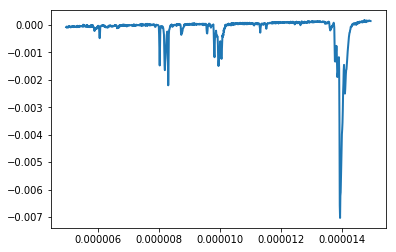

In [102]:
plt.plot(X0[:,0], X0[:,1])

La manera más simple de leer datos de un archivo es a través de `loadtxt()`.

```python
np.info(np.loadtxt)
 loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None,
         converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0,
         encoding='bytes')
Load data from a text file.

Each row in the text file must have the same number of values.
```

En su forma más simple sólo necesita como argumento el nombre del archivo. En este caso, había una primera línea que fue ignorada porque empieza con el caracter "#" que indica que la línea es un comentario.

Veamos otro ejemplo, donde las líneas que son parte de un encabezado se saltean, utilizando el argumento `skiprows`

In [104]:
fdatos= '../data/exper_col.dat'
!head ../data/exper_col.dat

In [105]:
X1 = np.loadtxt(fdatos, skiprows=5)
print(X1.shape)
print(X1[0])

(76, 4)
[ 9.901      15.35198465 12.12121212 14.86049333]


Como el archivo tiene cuatro columnas el array `X` tiene dimensiones `(74, 4)` correspondiente a las 74 filas y las 4 columnas. Si sólo necesitamos un grupo de estos datos podemos utilizar el argumento `usecols = (c1, c2)` que nos permite elegir cuáles son las columnas a leer:

In [106]:
x, y = np.loadtxt(fdatos, skiprows=5, usecols=[0, 2], unpack=True)
print (x.size, y.size)

76 76


In [108]:
Y = np.loadtxt(fdatos, skiprows=5, usecols=[0, 2])
print (Y.size, Y[0])

152 [ 9.901      12.12121212]


En este ejemplo, mediante el argumento `unpack=True`, le indicamos a la función `loadtxt`que desempaque lo que lee en variables diferentes (`x,y` en este caso)

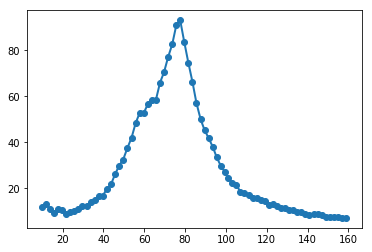

In [109]:
plt.plot(x,y, 'o-')

Como numpy se especializa en manejar números, tiene muchas funciones para crear arrays a partir de información numérica a partir de texto o archivos (como los CSV, por ejemplo). Ya vimos como leer datos con `loadtxt`. También se pueden generar desde un string:

In [110]:
np.fromstring(u"1.0 2.3   3.0 4.1   -3.1", sep=" ", dtype=float)

array([ 1. ,  2.3,  3. ,  4.1, -3.1])

Para guardar datos en formato texto podemos usar, de la misma manera,

In [111]:
Y = np.vstack((x,y)).T
print(Y.shape)

(76, 2)


In [112]:
np.savetxt('tmp.dat', Y)

In [113]:
!head tmp.dat

9.900999999999999801e+00 1.212121212121209979e+01
1.188100000000000023e+01 1.338496506439940070e+01
1.379299999999999926e+01 1.101369465980729956e+01
1.581300000000000061e+01 9.490067063140580572e+00
1.780199999999999960e+01 1.106306508676360068e+01
1.978399999999999892e+01 1.056836569579290064e+01
2.180600000000000094e+01 9.041259351048690718e+00
2.380199999999999960e+01 9.743805123897519849e+00
2.567999999999999972e+01 1.000583998442670008e+01
2.769900000000000162e+01 1.093034161826770045e+01


La función `savetxt()`tiene varios argumentos opcionales:

```python
np.savetxt(fname, X, fmt='%.18e', delimiter=' ', newline='\n', header='', footer='', comments='# ', encoding=None)
```

Por ejemplo, podemos darle un formato de salida con el argumento `fmt`, y darle un encabezado con `header`

In [114]:
np.savetxt('tmp.dat', Y, fmt='%.6g', header="Energ Exper")
!head tmp.dat

# Energ Exper
9.901 12.1212
11.881 13.385
13.793 11.0137
15.813 9.49007
17.802 11.0631
19.784 10.5684
21.806 9.04126
23.802 9.74381
25.68 10.0058


#### Datos en formato binario

In [115]:
np.save('test.npy', X1)  # Grabamos el array a archivo 
X2 = np.load('test.npy')     # Y lo leemos

In [118]:
# Veamos si alguno de los elementos difiere
print('X1=', X1[:10])
print('X2=', X2[:10])

X1= [[ 9.901      15.35198465 12.12121212 14.86049333]
 [11.881      17.25443986 13.38496506 12.137559  ]
 [13.793      17.54513159 11.01369466 12.33403468]
 [15.813      14.67147284  9.49006706 10.68943707]
 [17.802      15.05448826 11.06306509 11.11859838]
 [19.784      12.99029519 10.5683657  10.77717061]
 [21.806      12.19847748  9.04125935 10.50844347]
 [23.802      13.57028821  9.74380512 10.46262448]
 [25.68       13.16199377 10.00583998  9.76919784]
 [27.699      14.91028557 10.93034162 11.29189365]]
X2= [[ 9.901      15.35198465 12.12121212 14.86049333]
 [11.881      17.25443986 13.38496506 12.137559  ]
 [13.793      17.54513159 11.01369466 12.33403468]
 [15.813      14.67147284  9.49006706 10.68943707]
 [17.802      15.05448826 11.06306509 11.11859838]
 [19.784      12.99029519 10.5683657  10.77717061]
 [21.806      12.19847748  9.04125935 10.50844347]
 [23.802      13.57028821  9.74380512 10.46262448]
 [25.68       13.16199377 10.00583998  9.76919784]
 [27.699      14.91028

In [117]:
print('¿Alguna differencia?', np.any(X1-X2))

¿Alguna differencia? False


### Ejemplo de análisis de palabras

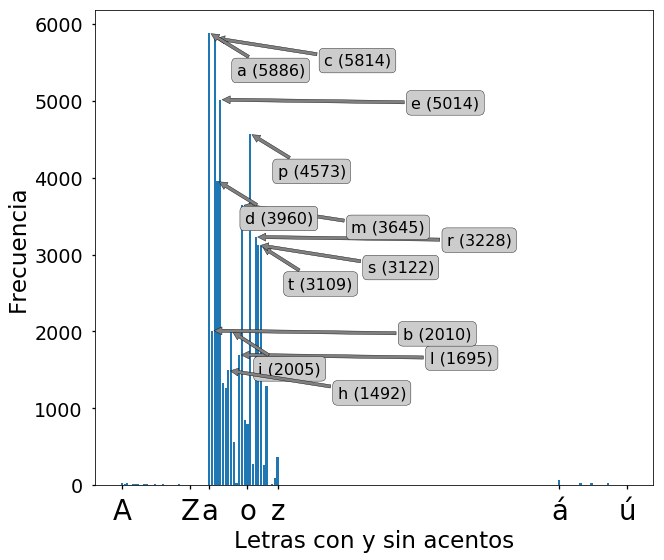

In [120]:
# %load scripts/10_palabras.py
#! /usr/bin/ipython
import numpy as np
import matplotlib.pyplot as plt
import gzip
ifiname = '../data/palabras.words.gz'

letras = [0] * 512
with gzip.open(ifiname, mode='r') as fi:
  for l in fi.readlines():
    c = ord(l.decode('utf-8')[0])
    letras[c] += 1

nmax = np.nonzero(letras)[0].max() + 1
z = np.array(letras[:nmax])
# nmin = z.nonzero()[0].min()     # Máximo valor diferente de cero
nmin = np.argwhere(z != 0).min()
#plt.ion()
with plt.style.context(['seaborn-talk', 'presentation']):
  fig = plt.figure(figsize=(10, 8))
  #plt.clf()
  plt.bar(np.arange(nmin, nmax), z[nmin:nmax])
  plt.xlabel('Letras con y sin acentos')
  plt.ylabel('Frecuencia')

  labels = ['A', 'Z', 'a', 'o', 'z', 'á', 'ú']
  ll = [r'$\mathrm{{{}}}$'.format(t) for t in labels]
  ts = [ord(t) for t in labels]
  plt.xticks(ts, ll, fontsize='xx-large')

  x0 = 0.5 * ord('á') + ord('z')
  y0 = 0.2 * z.max()
  umbral = 0.25
  lista = (z > umbral * z.max()).nonzero()[0]

  dx = [10, 40, 70]
  dy = [-550, -350, -100]

  for j, t in enumerate(reversed(lista)):
    plt.annotate('{} ({})'.format(chr(t), z[t]), xy=(t, z[t]), xycoords='data',
                 xytext=(t + dx[j % 3], z[t] + dy[j % 3]), bbox=dict(boxstyle="round", fc="0.8"),
                 arrowprops=dict(arrowstyle="simple", fc="0.5")
                 )


### Entrada y salida en Scipy

El submódulo `io` tiene algunas utilidades de entrada y salida de datos que permite interactuar con otros paquetes/programas. Algunos de ellos son:

- Archivos IDL ![Interactive Data Language](https://hesperia.gsfc.nasa.gov/hessi/solar_cd/FAQ/IDL_FAQ.htm)
   - `scipy.io.readsav()`

- Archivos de sonido wav, con `scipy.io.wavfile`
   - `scipy.io.wavfile.read()`
   - `scipy.io.wavfile.write()`

- Archivos fortran sin formato, con `scipy.io.FortranFile`

- Archivos Netcdf (para gran número de datos), con  `scipy.io.netcdf`

- Archivos de matrices de Matlab

In [122]:
from scipy import io as sio
a = np.ones((3, 3)) + np.eye(3,3)
print(a)
sio.savemat('datos.mat', {'a': a}) # savemat espera un diccionario
data = sio.loadmat('datos.mat', struct_as_record=True)
print(data['a'])

[[2. 1. 1.]
 [1. 2. 1.]
 [1. 1. 2.]]
[[2. 1. 1.]
 [1. 2. 1.]
 [1. 1. 2.]]


In [123]:
data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Mon Mar 25 10:27:05 2019',
 '__version__': '1.0',
 '__globals__': [],
 'a': array([[2., 1., 1.],
        [1., 2., 1.],
        [1., 1., 2.]])}